# Decision Trees

First we'll load some fake data on past hires I made up. Note how we use pandas to convert a csv file into a DataFrame:

In [2]:
import pandas as pd
from sklearn import tree

input_file = "PastHires.csv"
df = pd.read_csv(input_file, header = 0)

In [13]:
df.head(13)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


scikit-learn needs everything to be numerical for decision trees to work. So, we'll map Y,N to 1,0 and levels of education to some scale of 0-2. In the real world, you'd need to think about how to deal with unexpected or missing data! By using map(), we know we'll get NaN for unexpected values.

In [14]:
mapping = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(mapping)
df['Employed?'] = df['Employed?'].map(mapping)
df['Top-tier school'] = df['Top-tier school'].map(mapping)
df['Interned'] = df['Interned'].map(mapping)
df['Level of Education'] = df['Level of Education'].map({'BS': 0, 'MS': 1, 'PhD': 2})
df.head(13)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0
5,0,0,0,2,1,1,1
6,5,1,2,1,0,1,1
7,3,0,1,0,0,1,1
8,15,1,5,0,0,0,1
9,0,0,0,0,0,0,0


Next we need to separate the features from the target column that we're trying to bulid a decision tree for.

In [15]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

Now actually construct the decision tree:

In [16]:
y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

... and display it. Note you need to have pydotplus installed for this to work. (!pip install pydotplus)

To read this decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So value = [0. 5.] mean there are 0 "no hires" and 5 "hires" by the tim we get to that point. value = [3. 0.] means 3 no-hires and 0 hires.

In [3]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

/Users/home/opt/miniconda3/envs/datascience/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


NameError: name 'clf' is not defined

## Ensemble learning: using a random forest

We'll use a random forest of 10 decision trees to predict employment of specific candidate profiles:

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

#Predict employment of an employed 10-year veteran
print (clf.predict([[10, 1, 4, 0, 0, 0]]))
#...and an unemployed 10-year veteran
print (clf.predict([[10, 0, 4, 0, 0, 0]]))

[1]
[1]


## Activity

Modify the test data to create an alternate universe where everyone I hire everyone I normally wouldn't have, and vice versa. Compare the resulting decision tree to the one from the original data.


In [19]:
y2 = df["Hired"].map(lambda x: 0 if x == 1 else 1)
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X,y2)

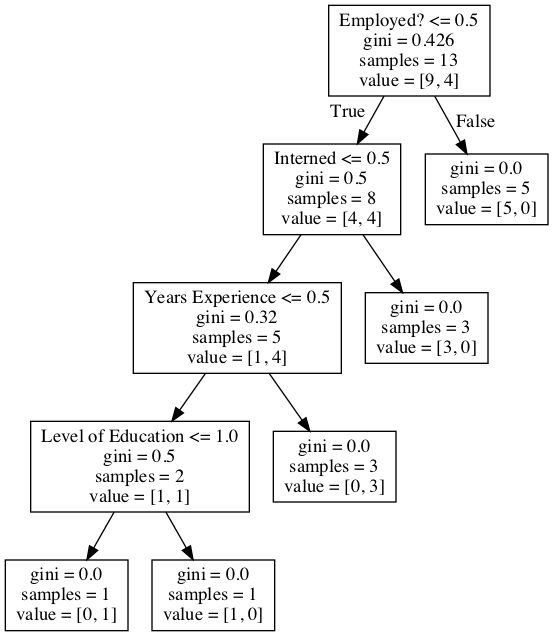

In [20]:
dot_data = StringIO()  
tree.export_graphviz(clf2, out_file=dot_data, feature_names=features)  
graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph2.create_png())  

In [21]:
clf2 = RandomForestClassifier(n_estimators=10)
clf2 = clf2.fit(X, y2)

#Predict employment of an employed 10-year veteran
print (clf2.predict([[10, 1, 4, 0, 0, 0]]))
#...and an unemployed 10-year veteran
print (clf2.predict([[10, 0, 4, 0, 0, 0]]))

[0]
[1]



# Activity
Predict possibility to survive on Titanic depending on different parameters

In [46]:
df = pd.read_csv("titanic.csv", header = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
df["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [48]:
emb = {"S": 1, "C":2, "Q":3}
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Embarked"] = df["Embarked"].map(lambda x: emb[x] if x in emb else 0)
df["Sex"] = df["Sex"].map(lambda x: 1 if "female" in x else 0)

df["Age"].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64

In [49]:
features = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
measure = df["Survived"]
features.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,2
2,3,1,26.000000,0,0,7.9250,1
3,1,1,35.000000,1,0,53.1000,1
4,3,0,35.000000,0,0,8.0500,1
5,3,0,29.699118,0,0,8.4583,3
6,1,0,54.000000,0,0,51.8625,1
7,3,0,2.000000,3,1,21.0750,1
8,3,1,27.000000,0,2,11.1333,1
9,2,1,14.000000,1,0,30.0708,2


In [50]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features,measure)

In [ ]:
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features.columns)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(features,measure)


In [ ]:
passenger1 = {"Pclass":1, "Sex": 0, "Age": 22, "SibSp":1, "Parch": 0, "Fare": 7.25, "Embarked": 1}
print (clf.predict([list(passenger1.values())]))

passenger2 = {"Pclass":1, "Sex": 1, "Age": 22, "SibSp":1, "Parch": 0, "Fare": 7.25, "Embarked": 1}
print (clf.predict([[1, 1, 38, 1, 0, 71, 2]]))
